

---


<h1> <center>CUSTOMER CHURN PREDICTION </H1>

---



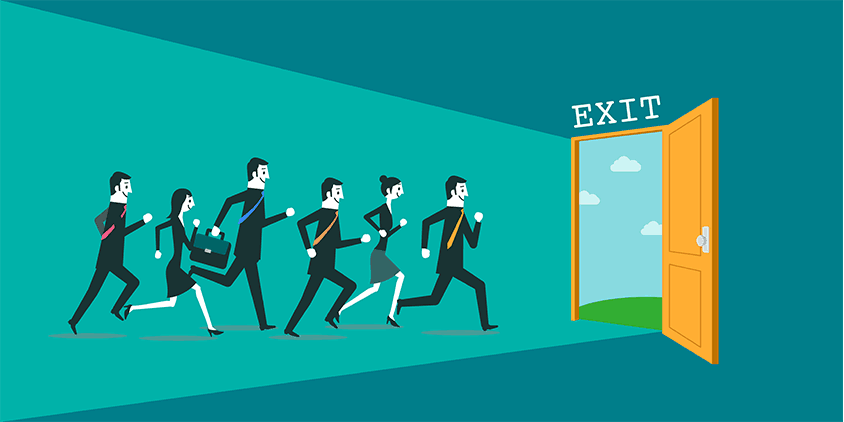



---


# INTRODUCTION

---



<h3><b> What Is Customer Churn? </b> </h3>

<h4> Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame.

<br>

<h3><b> Why is it important ?</b> </h3>
 <h4> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</h4>

# APPROACH

---




1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. ***Missing values:*** Impute all missing values using Mean, Median and Mode
      2. ***Inconistent values:*** Replace all inconsistence with consistent("NA" or "Unknown" )
      3. ***Outliers:*** Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. ***Uni-Variant Analysis:*** Mean, Median, Mode, Skewness
      2. ***Bi-Varient Analysis:*** Correlation, Covariance, Chi-square test
      3. ***Multi-Varient Analysis:***
        1. Classification
        2. Apply all Classification model
        3. Evaluate which is the better model
       


# IMPORTING LIBRARIES



---






In [1]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 62.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=097b65a5d4c963928588ee2ee11d2532454d306995ddc135dbe4f4ea5944c667
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.

In [2]:
!pip install plotly

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go

<ipython-input-3-915217adb1ee>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
#Model Building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# PERFORMING EXPLORATORY DATA ANALYSIS

---



## UNDERSTANDING DATA

---



In [5]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [6]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [7]:
#Overview of the dataset
report = pandas_profiling.ProfileReport(pd.read_excel("/content/customer_churn_large_dataset.xlsx"))

In [8]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


---

> <h2><b><i> INFERENCE: </b></i></h2>
---

*   <h3> SHAPE : <h3>

    In total, There are 10,000 records and has 9 distinct columns. Out of which 5 columns are Numerical and rest of the 4 columns are Categorical.
    <table><h4>
  <tr>
    <th>CATERGORICAL</th>
    <th>NUMERICAL</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>Age</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Subscription_Length_Months</td>
  </tr>
  <tr>
    <td>Location</td>
    <td>Monthly_Bill</td>
  </tr>
  <tr>
    <td>Churn</td>
    <td>Total_Usage_GB</td>
  </tr>
</table></h4>
  
   Another Numerical column "CustomerID"and "Name" is not required for the analysis.

<br>


*  <h3>MISSING VALUES :</h3>
    
    There is no Missing values in the data.
    
<BR>

*  <h3>DUPLICATE VALUES :</h3>

    There is no Duplicate values in the data.  
---


## DATA MANIPULATION

---



In [10]:
# Drop the "CustomerID" Column
df.drop(["CustomerID","Name"],inplace = True,axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


*Successfully dropped the column !!!*


---


## DATA VISUALISATION


---

*Unveiling Insights Through Visualizations....*

<ipython-input-12-9728d854d494>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='0.1f')


<Axes: >

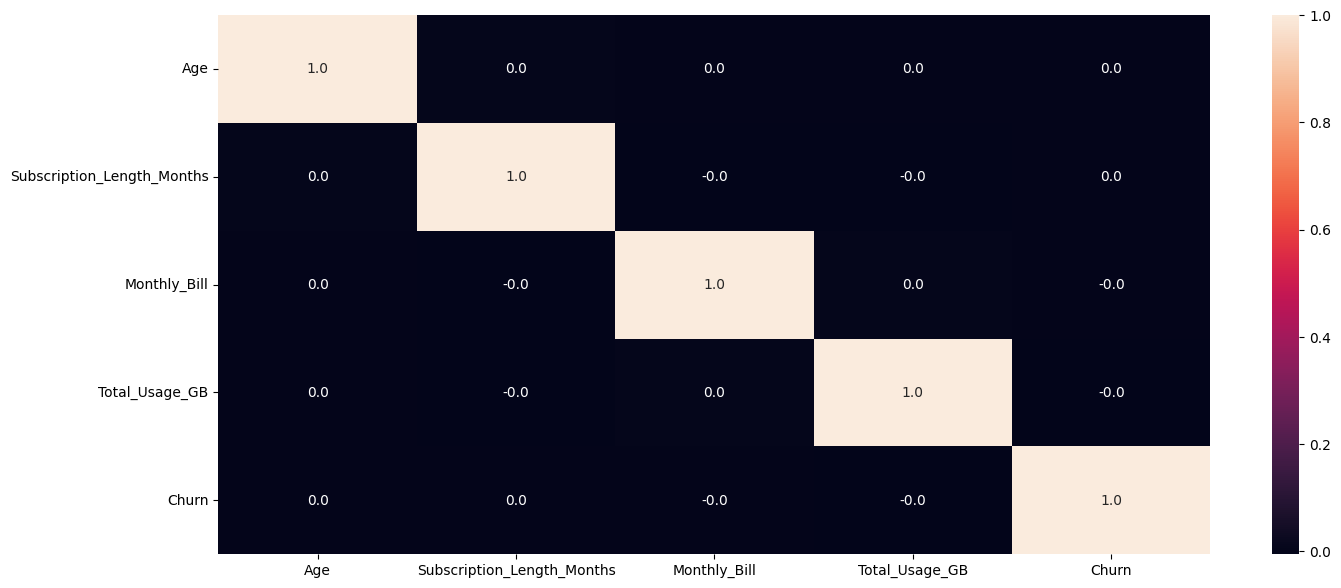

In [12]:
#Visualizing Correlation of the data
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')



> **INFERENCE:**


---

We can observe that there is a lack of discernible relationships between various columns.The distributions appear to be uniformly spread, indicating that no specific column holds a distinctive influence over the others.


<Axes: title={'center': 'Target Class Distribution'}, ylabel='Churn'>

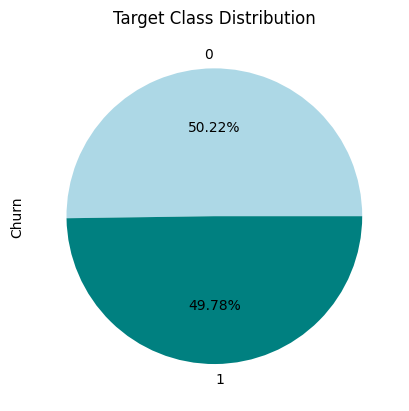

In [13]:
#Distribution of Target variable
plt.title('Target Class Distribution')
df['Churn'].value_counts().plot(kind='pie',autopct='%0.2f%%',colors=['lightblue', 'teal'])

> **INFERENCE:**


---



From the above visualisation we can observe that ,



*   50.22% belongs to Non - Churn
*   49.78% belongs to Churn class


In [14]:
#Distribution of Location

labels = df['Location'].unique()
values = df['Location'].value_counts()

# Define custom colors for the pie slices
teal_color = ['#16a085', '#1abc9c', '#008080', '#FFCC99', '#FFD700']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, marker=dict(colors=[teal_color]))])
fig.update_layout(title_text="<b>Location</b>")
fig.show()

> **INFERENCE:**


---

We can observe that all the cities are equally used.

In [15]:
# Churn Distribution VS Gender
color_map = {"Yes": "#FF97FF", "No": "blue"}
fig = px.histogram(df, x="Churn", color="Gender", barmode="group", title="<b>Churn distribution WRT Gender</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

> **INFERENCE:**


---

With Respect to gender, Both the male and female are equally churned.

<Figure size 500x800 with 0 Axes>

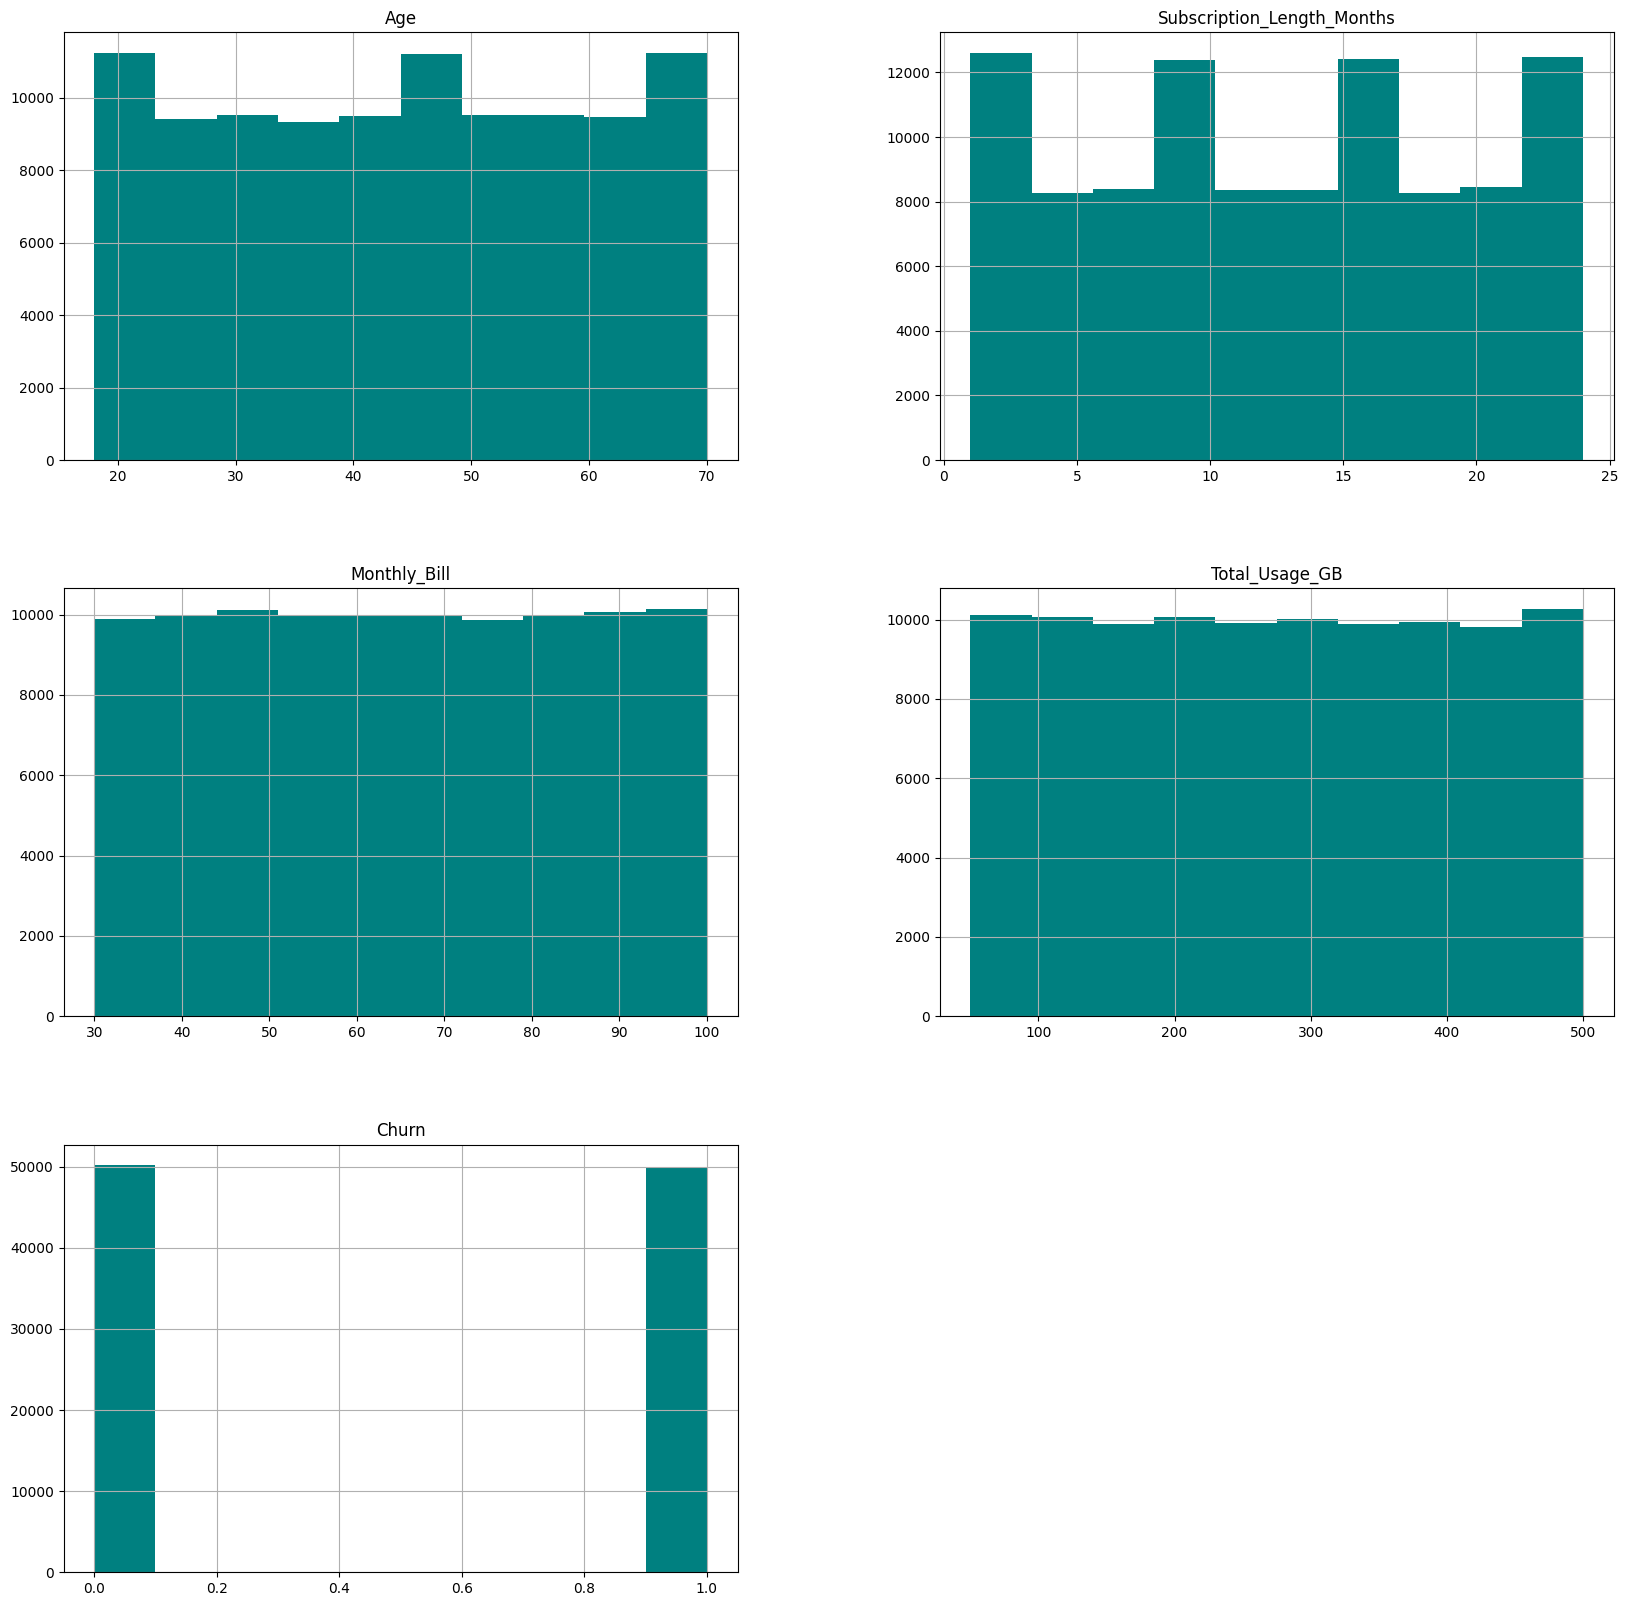

In [16]:
#Distribution of Numerical Variable
plt.figure(figsize=(5,8))
df.hist(figsize=(20,20),color='teal')
plt.show()

## SPLIT THE TRAIN AND TEST DATA

---



In [17]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']


In [18]:
print(x.shape)
print(y.shape)

(100000, 6)
(100000,)


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(80000, 6)
(80000,)
(20000, 6)
(20000,)


## FEATURE ENGINEERING

---



In [21]:
# Use pandas get_dummies
data_encoded = pd.get_dummies(df)
data_encoded.head(10)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,0,1,0,0,1,0,0
1,62,1,48.76,172,0,1,0,0,0,0,0,1
2,24,5,85.47,460,0,1,0,0,0,1,0,0
3,36,3,97.94,297,1,1,0,0,0,0,1,0
4,46,19,58.14,266,0,1,0,0,0,0,1,0
5,67,15,82.65,456,1,0,1,0,0,0,0,1
6,30,3,73.79,269,0,1,0,1,0,0,0,0
7,67,1,97.70,396,1,1,0,0,0,0,1,0
8,20,10,42.45,150,1,1,0,0,0,0,1,0
9,53,12,64.49,383,1,1,0,0,0,1,0,0


## PIPELINE


---



In [22]:
#Define the categorical columns

categorical_columns = ["Gender","Location"]

In [23]:
# Create a ColumnTransformer to apply different preprocessing to different columns

preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_columns)],remainder='passthrough')

In [24]:
#Create a pipeline that includes preprocessing and scaling

pipeline = Pipeline(steps=[('preprocessor', preprocessor),('scaler', StandardScaler())])

In [25]:
# Apply the pipeline to the training and test sets

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [26]:
df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [27]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1




---


# MODEL BUIDLING

---




## LOGISTIC REGRESSION

---



In [28]:
lr=LogisticRegression()


In [29]:
lr.fit(x_train,y_train)

lr_preds_train = lr.predict(x_train)
lr_preds_test = lr.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, lr_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, lr_preds_test),2))

Train accuracy score of the model is:  0.5
Test accuracy score of the model is:  0.5


##   RANDOM FOREST


---



In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train, y_train)

rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, rf_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, rf_preds_test),2))

Train accuracy score of the model is:  1.0
Test accuracy score of the model is:  0.5


## XG BOOST

---



In [32]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
xgb_preds_train = xgb.predict(x_train)
xgb_preds_test = xgb.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, xgb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, xgb_preds_test),2))

Train accuracy score of the model is:  0.66
Test accuracy score of the model is:  0.5


## K-NEAREST NEIGHBOURS

---



In [34]:
knn = KNeighborsClassifier(n_neighbors=500, metric='minkowski', p=2)

In [35]:
knn.fit(x_train, y_train)

knn_preds_train = knn.predict(x_train)
knn_preds_test = knn.predict(x_test)

print('Train accuracy score of the model is: ', round(accuracy_score(y_train, knn_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, knn_preds_test),2))

Train accuracy score of the model is:  0.52
Test accuracy score of the model is:  0.5


## GRID SEARCH


---



In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
random_grid = {'criterion' :['gini','entropy','log_loss'],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [38]:
rf =  RandomForestClassifier()

In [39]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,verbose=2, random_state=123)

In [40]:
search = clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=  22.2s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=  15.3s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=  15.7s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=  15.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=  15.0s
[CV] END criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=130; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  35.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=log_loss, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=230; total time=  33.6s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=  14.3s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=  14.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=  14.4s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=  14.8s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=230; total time=  14.9s
[CV] END criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  17.2s
[CV] END criterion=e

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  16.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  17.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=80, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=130; total time=  17.1s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=  28.2s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=  28.4s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=  31.4s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=  29.1s
[CV] END criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=230; total time=  28.5s
[CV] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=180; total time=  17.1s
[CV] END criterion

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=  25.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=  25.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=  25.5s


In [41]:
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'log_loss'}

In [42]:
search.best_score_

0.502575



> <B><H3>INFERENCE:</H3></B>


---

<H4>After conducting a comprehensive analysis of this dataset, it becomes evident that there is a lack of discernible relationships between various columns. The distributions appear to be uniformly spread, indicating that no specific column holds a distinctive influence over the others.</H4>

<H5><I>Let us dive into advanced techniques to explore the potential for achieving enhanced results.</H5></I>
<br>


---



# DEEP LEARNING


---



In [43]:
# Importing all required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [63]:
# Apply preprocessing and store the transformed features
X_preprocessed = pipeline.fit_transform(df)

## TREATING THE IMBALANCED DATA

---



In [66]:
from imblearn.over_sampling import SMOTE
x = x.loc[:,~x.columns.duplicated()]
sm = SMOTE(random_state=42)
x_bal, y_bal= sm.fit_resample(X_preprocessed, y,)

<Axes: title={'center': 'Class'}>

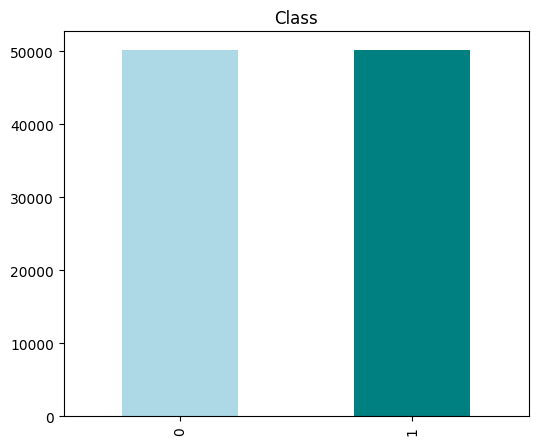

In [68]:
#Visualising the imbalanced data
y_bal.value_counts().plot(kind='bar', title='Class', color=['lightblue', 'teal'],figsize=(6,5))

## CREATE MODEL

---



In [67]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2)

In [69]:
# Declare Sequential Model
model=Sequential()

In [70]:
# Build model
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1])) # Input layer with the number of features

model.add(Dropout(0.5))  # Adding dropout layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout layer

model.add(Dense(units=1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

In [71]:
# Summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [82]:
# Train the model
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9975 - val_loss: 1.6047e-33 - val_accuracy: 1.0000
Epoch 2/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9979 - val_loss: 2.5495e-34 - val_accuracy: 1.0000
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.0039 - accuracy: 0.9978 - val_loss: 1.4092e-34 - val_accuracy: 1.0000
Epoch 4/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9977 - val_loss: 5.0081e-35 - val_accuracy: 1.0000
Epoch 5/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 4.1566e-37 - val_accuracy: 1.0000
Epoch 6/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9975 - val_loss: 8.6475e-38 - val_accuracy: 1.0000
Epoch 7/20
2000/2000 [==============================] - 4s 2ms/step - loss: 0.0039 - accuracy: 0.9975 - val_loss

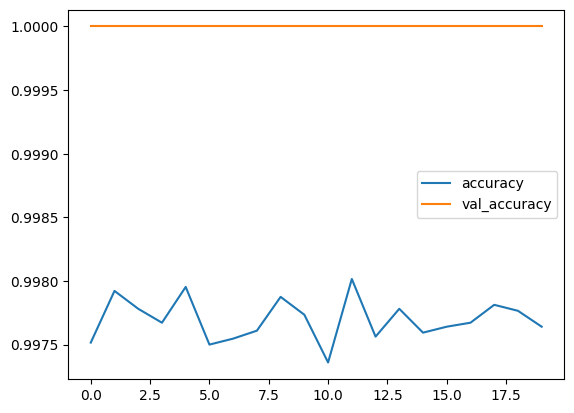

In [83]:
# Plotting Accuracy Graph

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

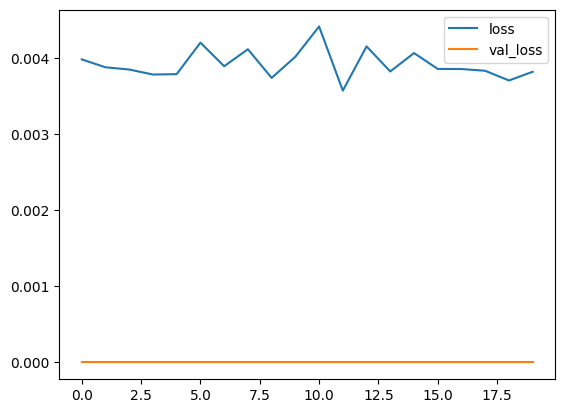

In [84]:
# Plotting Loss Graph
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [85]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


625/625 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0000, Test Accuracy: 1.0000


In [93]:
model.save("model.pkl")


> <h3>INFERENCE:</h3>


---

We can find that the test accuracy fits perfectly which might indicate that the data is overfitting due to less amount of data


# DEPLOYMENT

---



## USING GRADIO

 * To create simple and intuitive web applications for our model without the need for extensive web development.

In [86]:
!pip install gradio

In [91]:
import pickle
import pandas as pd
import gradio as gr

In [99]:
def predict_churn(age, gender, location, subscription_length_months, monthly_bill, total_used_gb):
    features = [{
        'Age': int(age),
        'Gender': gender,
        'Location': location,
        'Subscription_Length_Months': int(subscription_length_months),
        'Monthly_Bill': float(monthly_bill),
        'Total_Usage_GB': int(total_used_gb)
    }]

    features_df = pd.DataFrame(features)
    prediction = model.predict(features_df)[0]

    if prediction == 1:
        result = "Churn Warning: Customer May Be Nearing Exit."
    else:
        result = "Churn Resistant: Strong Customer Loyalty Indicated."

    return result

In [100]:
gender_input = gr.inputs.Dropdown(choices=['Male', 'Female'], label="Select Customer Gender")
location_input = gr.inputs.Dropdown(
    choices=['Houston', 'Los Angeles', 'Miami', 'Chicago', 'New York'],
    label="Select Customer Location"
)

<ipython-input-100-aed3c01259a5>:1: GradioDeprecationWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

<ipython-input-100-aed3c01259a5>:1: GradioDeprecationWarning:

`optional` parameter is deprecated, and it has no effect

<ipython-input-100-aed3c01259a5>:2: GradioDeprecationWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

<ipython-input-100-aed3c01259a5>:2: GradioDeprecationWarning:

`optional` parameter is deprecated, and it has no effect



In [101]:
inputs = [
    gr.inputs.Number(label="Customer Age"),
    gender_input,
    location_input,
    gr.inputs.Number(label="Subscription Length (Months)"),
    gr.inputs.Number(label="Monthly Bill"),
    gr.inputs.Number(label="Total Usage (GB)")
]

outputs = gr.outputs.Label()

churn_interface = gr.Interface(
    fn=predict_churn,
    inputs=inputs,
    outputs=outputs,
    title="Customer Churn Prediction",
    description="Predict whether a customer is likely to churn."
)

churn_interface.launch(share=True)


<ipython-input-101-1b48ffe55e6e>:2: GradioDeprecationWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

<ipython-input-101-1b48ffe55e6e>:2: GradioDeprecationWarning:

`optional` parameter is deprecated, and it has no effect

<ipython-input-101-1b48ffe55e6e>:5: GradioDeprecationWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

<ipython-input-101-1b48ffe55e6e>:5: GradioDeprecationWarning:

`optional` parameter is deprecated, and it has no effect

<ipython-input-101-1b48ffe55e6e>:6: GradioDeprecationWarning:

Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components

<ipython-input-101-1b48ffe55e6e>:6: GradioDeprecationWarning:

`optional` parameter is deprecated, and it has no effect

<ipython-input-101-1b48ffe55e6e>:7: GradioDeprecatio

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ee6e6a28dc143fdc45.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)




---


# CONCLUSION

---




*   Successfully developed an Customer Churn Prediction model using Python ,machine learning and deep learning techniques.



*   Machine Learning model did not give good results due to lack of discernible relationships between various columns.

*   By building Sequential model we could create a better model but not the best due to insufficient data quality and quality.

<br>


---

